In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    classification_report,
    confusion_matrix
)

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from catboost import CatBoostClassifier
from xgboost import XGBClassifier


In [42]:
df = pd.read_csv("/kaggle/input/fraudulent-transactions-prediction/Fraud.csv")
df.shape

(6362620, 11)

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
def plot_pie_chart(column, labels, y_label, title, ax=None):
    (df[column].value_counts() * 100.0 / len(df)).plot.pie(
        autopct="%.1f%%",
        labels=labels,
        ax=ax,
        fontsize=12
    )
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel(y_label, fontsize=12)
    ax.set_title(title, fontsize=12)
    

In [8]:
df.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

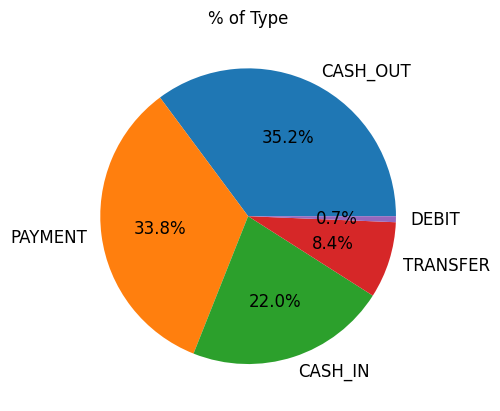

In [9]:
fig, axs = plt.subplots(1, 1)
plot_pie_chart('type', list((df['type'].value_counts()).index) ,"", '% of Type', axs)

In [10]:
col = ["isFraud", "isFlaggedFraud"]

In [11]:
df.isFlaggedFraud.value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [12]:
df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

CPU times: user 449 ms, sys: 52.3 ms, total: 501 ms
Wall time: 416 ms


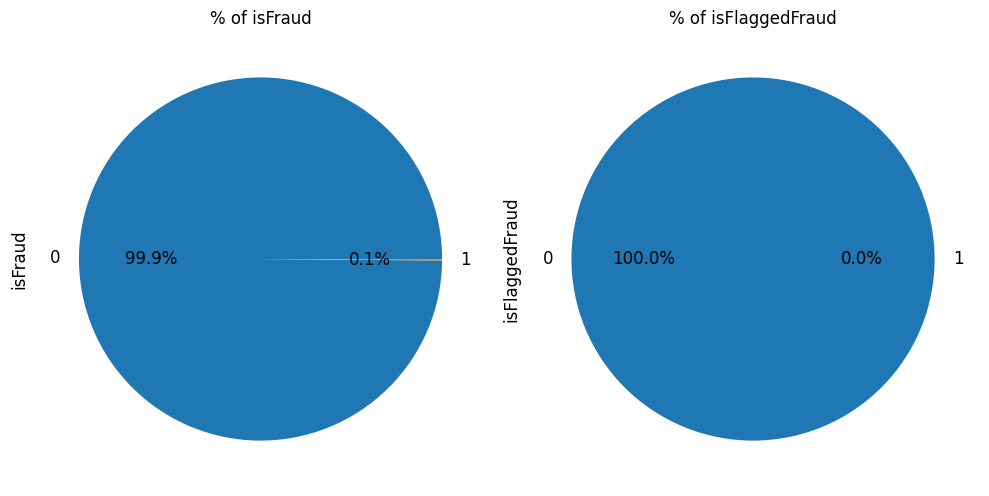

In [14]:
%%time
n_rows = 1
n_cols = 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 30))
for i, j in enumerate(col):
    plot_pie_chart(j, list((df[j].value_counts()).index), f'{j}', f'% of {j}', axs[i])
plt.tight_layout()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [19]:
df.shape

(6362620, 11)

In [16]:
df["type"].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [17]:
df.nameOrig.value_counts()

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64

In [20]:
df.nameDest.value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64

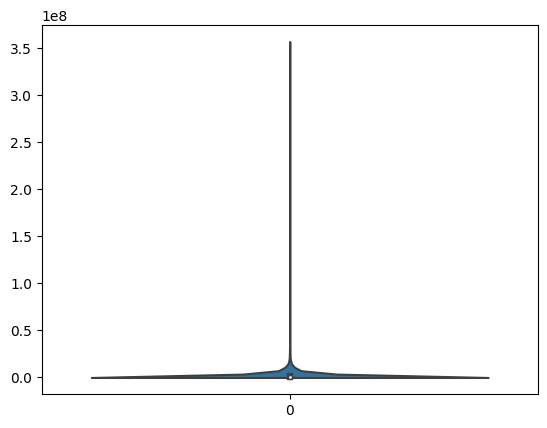

In [28]:
sns.violinplot(df.newbalanceDest);

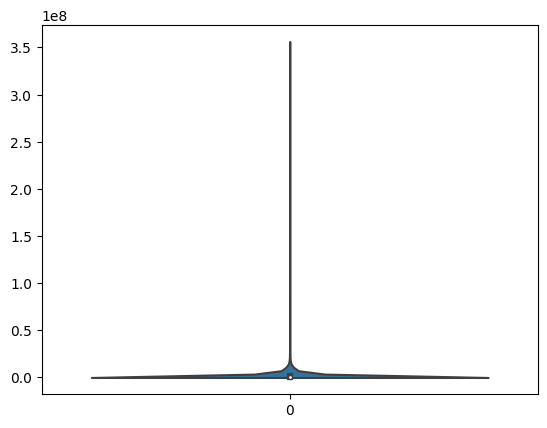

In [27]:
sns.violinplot(df.oldbalanceDest);

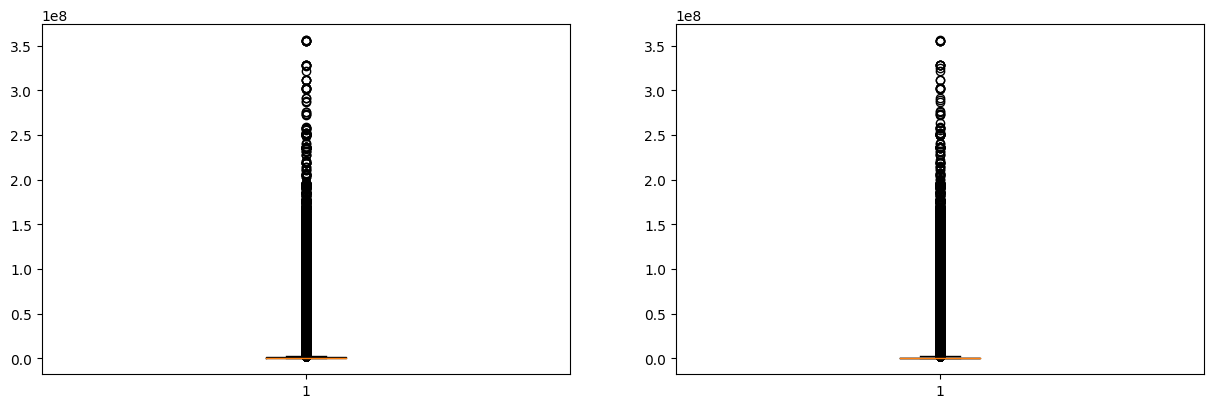

In [29]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.boxplot(df.newbalanceDest)
plt.subplot(2, 2, 2)
plt.boxplot(df.oldbalanceDest)
plt.show()

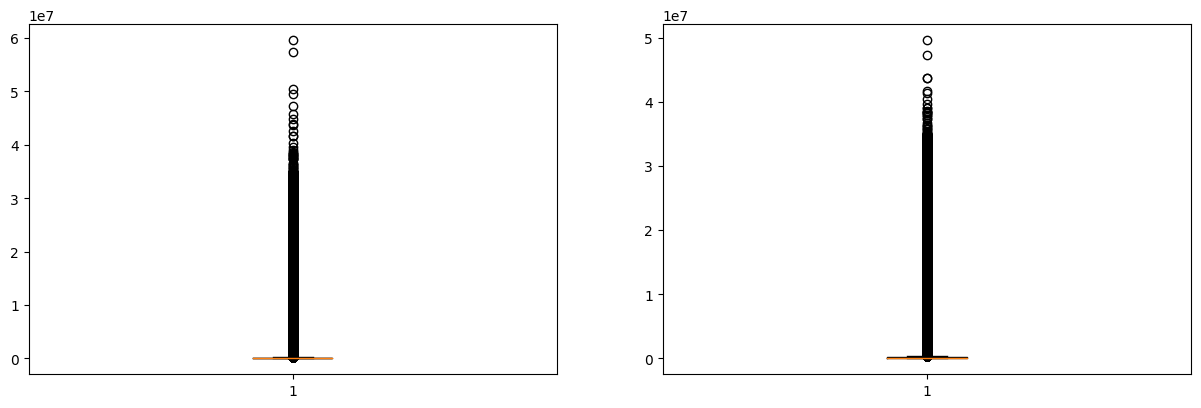

In [31]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.boxplot(df.oldbalanceOrg)
plt.subplot(2, 2, 2)
plt.boxplot(df.newbalanceOrig)
plt.show()

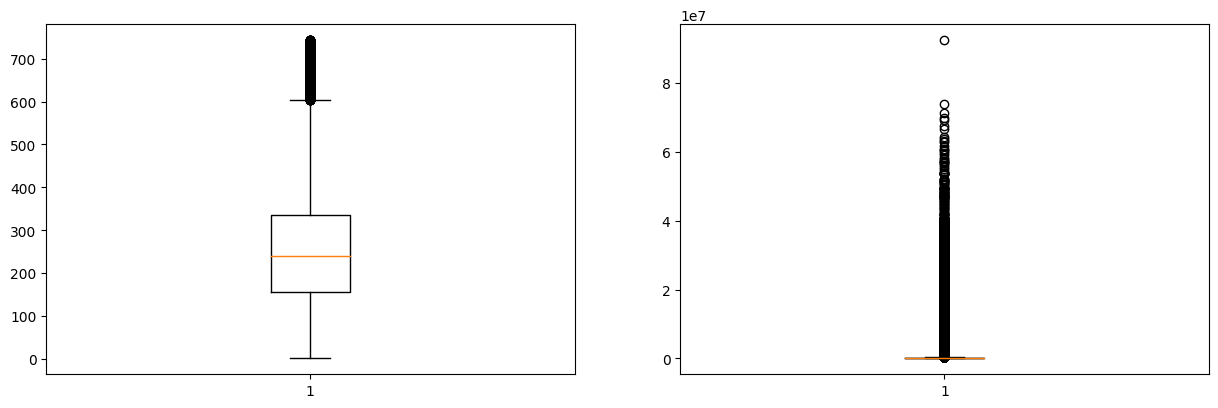

In [32]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.boxplot(df.step)
plt.subplot(2, 2, 2)
plt.boxplot(df.amount)
plt.show()

In [33]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [43]:
df.drop(
    ['nameOrig', 'nameDest', 'isFlaggedFraud'],
    axis=1,
    inplace=True
)

In [44]:
df.shape

(6362620, 8)

In [45]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [46]:
df = pd.get_dummies(df)
df.shape

(6362620, 12)

In [47]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,False,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,False,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,False,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,False,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,False,False,False,True,False


# Train Test Split

In [48]:
xtrain, xtest, ytrain, ytest = train_test_split(
    df.drop(['isFraud'], axis=1),
    df['isFraud'],
    stratify=df['isFraud'],
    test_size=0.1,
    random_state=42
)

xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((5726358, 11), (636262, 11), (5726358,), (636262,))

In [49]:
xtrain, xval, ytrain, yval = train_test_split(
    xtrain,
    ytrain,
    stratify=ytrain,
    test_size=0.1,
    random_state=42
)

xtrain.shape, xval.shape, ytrain.shape, yval.shape

((5153722, 11), (572636, 11), (5153722,), (572636,))

In [51]:
def metrics(y_test, y_pred):
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Precision: ', precision_score(y_test, y_pred))
    print('Recall: ', recall_score(y_test, y_pred))
    print('F_Score: ', f1_score(y_test, y_pred))
    print('Classification Report')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix')
    print(confusion_matrix(y_test, y_pred))

In [75]:
def CM(cm):
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='coolwarm',
        linewidths=0.5
    )
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

# Random Forest

In [50]:
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [52]:
%%time
rf_y_val_pred = rf.predict(xval)
rf_y_test_pred = rf.predict(xtest)

CPU times: user 11.8 s, sys: 24.9 ms, total: 11.8 s
Wall time: 11.8 s


In [55]:
metrics(yval, rf_y_val_pred)

Accuracy:  0.9996926494317507
Precision:  0.9811965811965812
Recall:  0.7767253044654939
F_Score:  0.8670694864048338
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    571897
           1       0.98      0.78      0.87       739

    accuracy                           1.00    572636
   macro avg       0.99      0.89      0.93    572636
weighted avg       1.00      1.00      1.00    572636

Confusion Matrix
[[571886     11]
 [   165    574]]


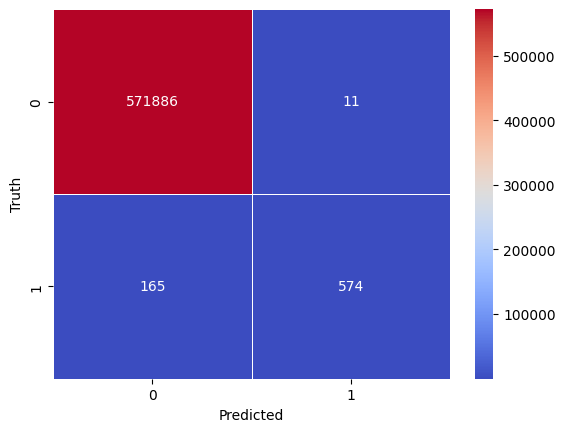

In [76]:
cm = confusion_matrix(yval, rf_y_val_pred)
CM(cm)

In [56]:
metrics(ytest, rf_y_test_pred)

Accuracy:  0.9996652322470931
Precision:  0.9720496894409938
Recall:  0.7624847746650426
F_Score:  0.8546075085324232
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635441
           1       0.97      0.76      0.85       821

    accuracy                           1.00    636262
   macro avg       0.99      0.88      0.93    636262
weighted avg       1.00      1.00      1.00    636262

Confusion Matrix
[[635423     18]
 [   195    626]]


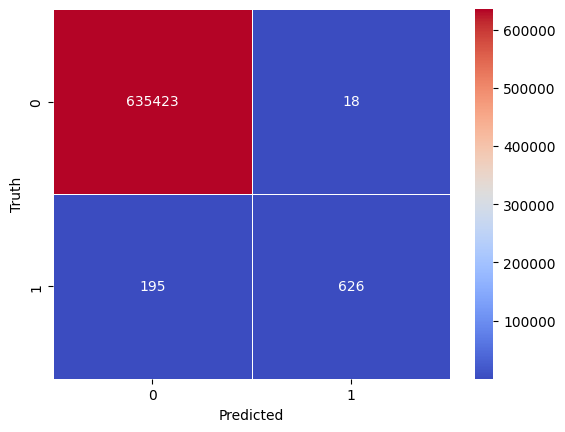

In [77]:
cm = confusion_matrix(ytest, rf_y_test_pred)
CM(cm)

# XGBoost

In [57]:
xg = XGBClassifier()
xg.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [63]:
%%time
xg_y_val_pred = xg.predict(xval)
xg_y_test_pred = xg.predict(xtest)

CPU times: user 6.5 s, sys: 128 ms, total: 6.62 s
Wall time: 3.01 s


In [64]:
metrics(yval, xg_y_val_pred)

Accuracy:  0.9997782186240474
Precision:  0.9553571428571429
Recall:  0.8687415426251691
F_Score:  0.9099929128277817
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    571897
           1       0.96      0.87      0.91       739

    accuracy                           1.00    572636
   macro avg       0.98      0.93      0.95    572636
weighted avg       1.00      1.00      1.00    572636

Confusion Matrix
[[571867     30]
 [    97    642]]


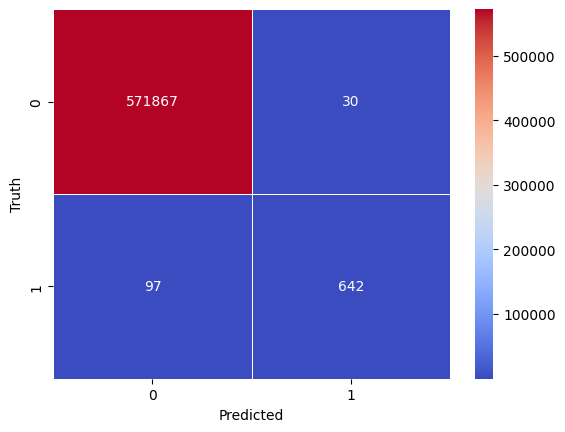

In [83]:
cm = confusion_matrix(yval, xg_y_val_pred)
CM(cm)

In [65]:
metrics(ytest, xg_y_test_pred)

Accuracy:  0.9997642480613332
Precision:  0.9552238805970149
Recall:  0.8574908647990256
F_Score:  0.9037227214377407
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635441
           1       0.96      0.86      0.90       821

    accuracy                           1.00    636262
   macro avg       0.98      0.93      0.95    636262
weighted avg       1.00      1.00      1.00    636262

Confusion Matrix
[[635408     33]
 [   117    704]]


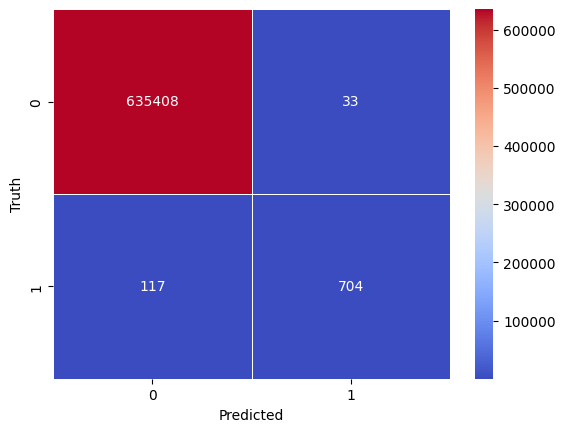

In [82]:
cm = confusion_matrix(ytest, xg_y_test_pred)
CM(cm)

# AdaBoost

In [61]:
ada = AdaBoostClassifier()
ada.fit(xtrain, ytrain)

AdaBoostClassifier()

In [66]:
%%time
ada_y_val_pred = ada.predict(xval)
ada_y_test_pred = ada.predict(xtest)

CPU times: user 7.25 s, sys: 32 ms, total: 7.28 s
Wall time: 7.28 s


In [67]:
metrics(yval, ada_y_val_pred)

Accuracy:  0.9993765673132671
Precision:  0.9244444444444444
Recall:  0.5629228687415426
F_Score:  0.6997476871320437
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    571897
           1       0.92      0.56      0.70       739

    accuracy                           1.00    572636
   macro avg       0.96      0.78      0.85    572636
weighted avg       1.00      1.00      1.00    572636

Confusion Matrix
[[571863     34]
 [   323    416]]


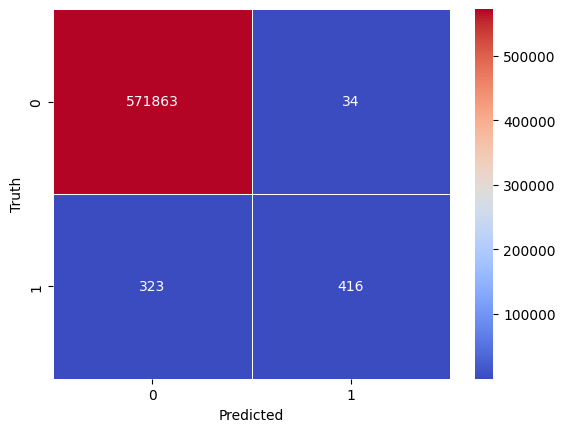

In [81]:
cm = confusion_matrix(yval, ada_y_val_pred)
CM(cm)

In [68]:
metrics(ytest, ada_y_test_pred)

Accuracy:  0.9993666131247819
Precision:  0.918
Recall:  0.559074299634592
F_Score:  0.6949280847842544
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635441
           1       0.92      0.56      0.69       821

    accuracy                           1.00    636262
   macro avg       0.96      0.78      0.85    636262
weighted avg       1.00      1.00      1.00    636262

Confusion Matrix
[[635400     41]
 [   362    459]]


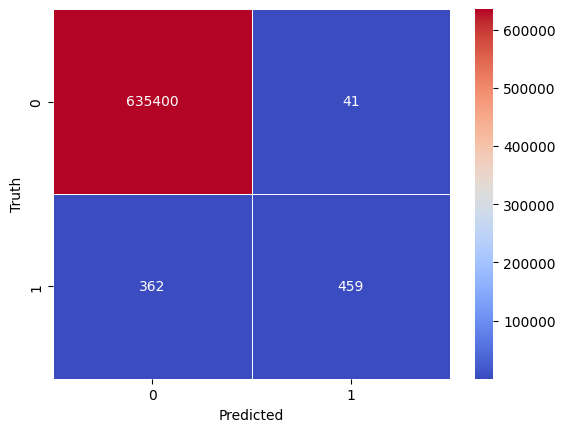

In [80]:
cm = confusion_matrix(ytest, ada_y_test_pred)
CM(cm)

# CatBoost

In [69]:
cb = CatBoostClassifier()
cb.fit(xtrain, ytrain)

Learning rate set to 0.396287
0:	learn: 0.0428962	total: 835ms	remaining: 13m 54s
1:	learn: 0.0188000	total: 1.43s	remaining: 11m 52s
2:	learn: 0.0078527	total: 2.03s	remaining: 11m 14s
3:	learn: 0.0035708	total: 2.65s	remaining: 10m 59s
4:	learn: 0.0030752	total: 3.27s	remaining: 10m 51s
5:	learn: 0.0027519	total: 3.87s	remaining: 10m 41s
6:	learn: 0.0024071	total: 4.49s	remaining: 10m 36s
7:	learn: 0.0023414	total: 5.07s	remaining: 10m 28s
8:	learn: 0.0021791	total: 5.68s	remaining: 10m 26s
9:	learn: 0.0021110	total: 6.29s	remaining: 10m 23s
10:	learn: 0.0019717	total: 6.92s	remaining: 10m 22s
11:	learn: 0.0019492	total: 7.53s	remaining: 10m 19s
12:	learn: 0.0019345	total: 8.15s	remaining: 10m 18s
13:	learn: 0.0018916	total: 8.8s	remaining: 10m 19s
14:	learn: 0.0017627	total: 9.43s	remaining: 10m 18s
15:	learn: 0.0016698	total: 10.2s	remaining: 10m 28s
16:	learn: 0.0016436	total: 11.1s	remaining: 10m 42s
17:	learn: 0.0016156	total: 11.9s	remaining: 10m 49s
18:	learn: 0.0015770	total:

In [72]:
%%time
cat_y_val_pred = cb.predict(xval)
cat_y_test_pred = cb.predict(xtest)

CPU times: user 8.48 s, sys: 32.4 ms, total: 8.51 s
Wall time: 6.58 s


In [73]:
metrics(yval, cat_y_val_pred)

Accuracy:  0.9997782186240474
Precision:  0.9553571428571429
Recall:  0.8687415426251691
F_Score:  0.9099929128277817
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    571897
           1       0.96      0.87      0.91       739

    accuracy                           1.00    572636
   macro avg       0.98      0.93      0.95    572636
weighted avg       1.00      1.00      1.00    572636

Confusion Matrix
[[571867     30]
 [    97    642]]


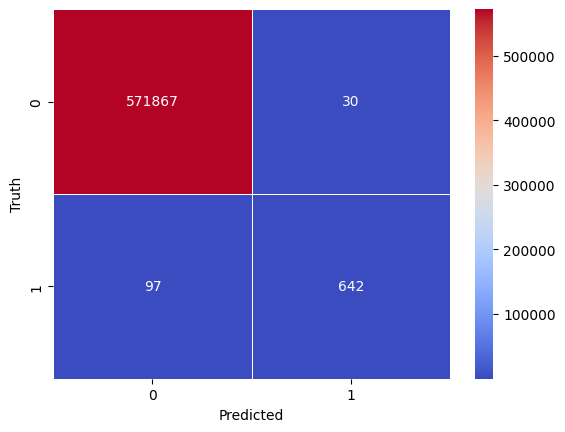

In [79]:
cm = confusion_matrix(yval, cat_y_val_pred)
CM(cm)

In [74]:
metrics(ytest, cat_y_test_pred)

Accuracy:  0.9998082550898844
Precision:  0.9678714859437751
Recall:  0.8806333739342266
F_Score:  0.9221938775510203
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635441
           1       0.97      0.88      0.92       821

    accuracy                           1.00    636262
   macro avg       0.98      0.94      0.96    636262
weighted avg       1.00      1.00      1.00    636262

Confusion Matrix
[[635417     24]
 [    98    723]]


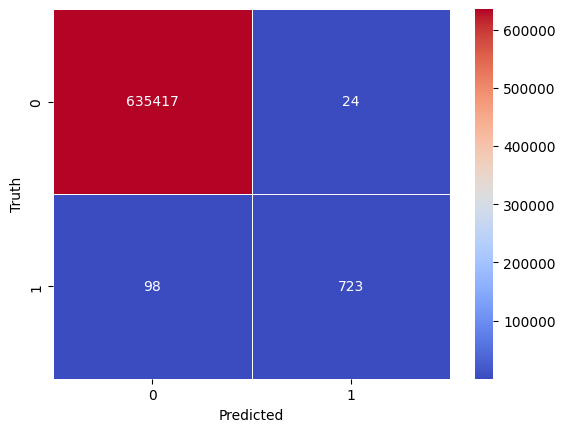

In [78]:
cm = confusion_matrix(ytest, cat_y_test_pred)
CM(cm)